In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
f  = xr.open_dataset('./astex_2010_v3a_SCAMIOP.nc')

In [54]:
f

<xarray.Dataset>
Dimensions:  (lat: 1, lev: 34, lon: 1, tsec: 41)
Coordinates:
  * lat      (lat) float32 34.0
  * lon      (lon) float32 -25.0
  * lev      (lev) float32 100.0 200.0 300.0 ... 95140.25 99185.59 102900.0
  * tsec     (tsec) int32 0 3600 7200 10800 ... 133200 136800 140400 144000
Data variables:
    calday   (tsec) float32 ...
    year     (tsec) int32 ...
    month    (tsec) int32 ...
    day      (tsec) int32 ...
    hour     (tsec) float32 ...
    nbdate   int32 ...
    bdate    int32 ...
    phis     (lat, lon) float32 ...
    Ps       (tsec, lat, lon) float32 ...
    Tg       (tsec, lat, lon) float32 ...
    T        (tsec, lev, lat, lon) float32 ...
    q        (tsec, lev, lat, lon) float32 ...
    u        (tsec, lev, lat, lon) float32 ...
    ug       (tsec, lev, lat, lon) float32 ...
    v        (tsec, lev, lat, lon) float32 ...
    vg       (tsec, lev, lat, lon) float32 ...
    divT     (tsec, lev, lat, lon) float32 ...
    divq     (tsec, lev, lat, lon) floa

In [34]:
f['lev'].values

array([1.000000e+02, 2.000000e+02, 3.000000e+02, 5.000000e+02,
       7.000000e+02, 1.000000e+03, 2.000000e+03, 3.000000e+03,
       5.000000e+03, 7.000000e+03, 1.000000e+04, 1.250000e+04,
       1.500000e+04, 1.750000e+04, 2.000000e+04, 2.250000e+04,
       2.500000e+04, 3.000000e+04, 3.500000e+04, 4.000000e+04,
       4.500000e+04, 5.000000e+04, 5.500000e+04, 6.000000e+04,
       6.500000e+04, 7.000000e+04, 7.500000e+04, 7.750000e+04,
       8.000000e+04, 8.513502e+04, 9.457734e+04, 9.514025e+04,
       9.918559e+04, 1.029000e+05], dtype=float32)

In [15]:
path="/lustre/ytzheng/"
Casename = 'ASTEX_cold2.6'

ff = xr.open_mfdataset(path + Casename + '/' +  '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

In [5]:
ff

<xarray.Dataset>
Dimensions:               (time: 90, z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
  * time                  (time) float32 165.02083 165.0625 ... 168.72917
Data variables:
    p                     (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST                   (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    Ps                    (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLDSHD                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    AREAPREC              (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLD245                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    WMAX                  (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    UMAX                  (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    PREC                  (time) float32 dask.array<chunksize=(90,), me

In [17]:
rgas = 287.
cp = 1005.
ggr = 9.8 

pres = f['lev'].values[::-1]
tt = f['T'].isel(tsec = 0).isel(lon = 0).isel(lat = 0).values[::-1]
ta = tt*(pres/100000.)**(rgas/cp) 
# ta = ta*(1 + 0.61*f['q'].isel(tsec = 0).isel(lon = 0).isel(lat = 0).values[::-1])
omega = f['omega'].isel(tsec = 0).isel(lon = 0).isel(lat = 0).values[::-1]

In [18]:
# ta = ta + np.append(0.5*np.diff(ta), 0)

In [26]:
nz = 34
zz = np.zeros(nz)

zz[0] = rgas/ggr*ta[0]*np.log(pres[0]/pres[0])

for i in range(1, nz):
    zz[i] = zz[i-1] + 0.5*rgas/ggr*(ta[i]+ta[i-1])*np.log(pres[i-1]/pres[i])

In [35]:
print(pres)

[1.029000e+05 9.918559e+04 9.514025e+04 9.457734e+04 8.513502e+04
 8.000000e+04 7.750000e+04 7.500000e+04 7.000000e+04 6.500000e+04
 6.000000e+04 5.500000e+04 5.000000e+04 4.500000e+04 4.000000e+04
 3.500000e+04 3.000000e+04 2.500000e+04 2.250000e+04 2.000000e+04
 1.750000e+04 1.500000e+04 1.250000e+04 1.000000e+04 7.000000e+03
 5.000000e+03 3.000000e+03 2.000000e+03 1.000000e+03 7.000000e+02
 5.000000e+02 3.000000e+02 2.000000e+02 1.000000e+02]


In [36]:
print(zz)

[    0.           311.91582634   657.37904472   706.40507204
  1564.04641146  2054.37446055  2299.63254634  2549.21190692
  3062.2656635   3595.53254987  4151.35704829  4733.01962216
  5344.74234504  5990.74430887  6675.46536846  7405.50144568
  8189.34217953  9037.21042069  9489.7670377   9966.43792635
 10474.94597593 11031.49127879 11662.83542731 12400.15171108
 13497.02135844 14445.77605411 15740.33536962 16660.49359553
 18054.42211048 18691.00940991 19247.62467946 20026.30375813
 20590.55494806 21429.84467178]


In [27]:
zplt = zz + np.append(0.5*np.diff(zz), 0)

In [28]:
rho = -(np.diff(pres)/np.diff(zz))/ggr

In [29]:
rho = np.append(rho, rho[-1])

In [30]:
omegaplt = omega + np.append(0.5*np.diff(omega), 0)

In [31]:
wplt = -omegaplt/(rho*ggr)

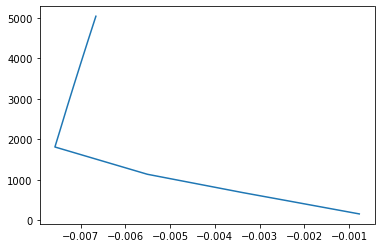

In [33]:
plt.plot(w[0:12], zplt[0:12])
# plt.xrange(0, 5000)

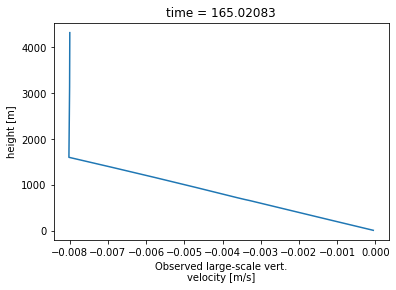

In [16]:
wbos0 = ff['WOBS'].isel(time = 0)
wbos0.plot(
    y = 'z',
    yincrease=True)

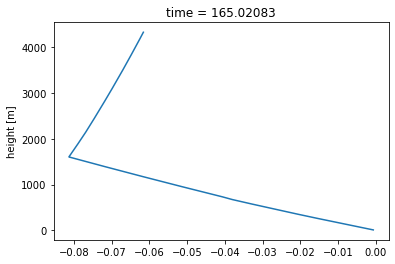

In [38]:
omega0 = (ff['WOBS']*ff['RHO']*ggr).isel(time = 0)
omega0.plot(
    y = 'z',
    yincrease=True)

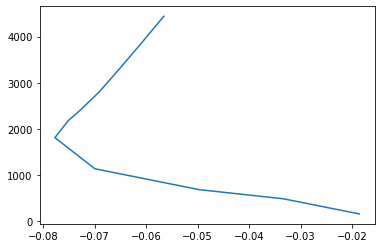

In [41]:
plt.plot(-omegaplt[0:11], zplt[0:11])

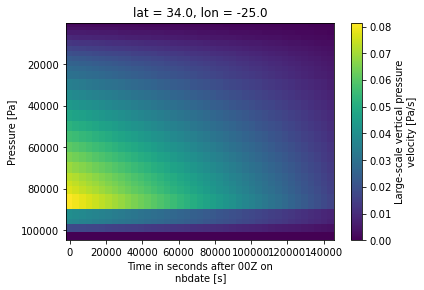

In [23]:
omega2d = f['omega'].isel(lat = 0).isel(lon = 0)

omega2d.plot(x = "tsec",yincrease=False)

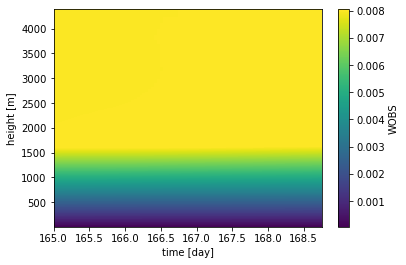

In [5]:
wobs2d = -ff['WOBS']

wobs2d.plot(x = "time",yincrease=True)

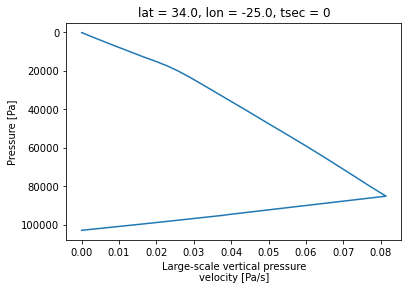

In [26]:
omega0 = f['omega'].isel(tsec = 0)
omega0.plot(
    y = 'lev',
    yincrease=False)

In [21]:
ff = ff.assign_coords(lev = ff['p'].values)
ff

<xarray.Dataset>
Dimensions:               (lev: 512, time: 90, z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
  * time                  (time) float32 165.02083 165.0625 ... 168.72917
  * lev                   (lev) float32 1027.7781 1026.3826 ... 624.81 613.9746
Data variables:
    p                     (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST                   (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    Ps                    (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLDSHD                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    AREAPREC              (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLD245                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    WMAX                  (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    UMAX                  (time) float32 dask.array<chunksize=(90,)

ValueError: y must be either None or one of ('z')

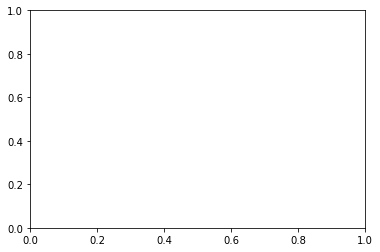

In [27]:
wbos0 = ff['WOBS'].isel(time = 0)
# wbos0 = wbos0.assign_coords(lev = ff['p'].values)
ff['WOBS'].isel(time = 0).plot(
    y = 'lev',
    yincrease=True)

In [29]:
ff

<xarray.Dataset>
Dimensions:               (lev: 512, time: 90, z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
  * time                  (time) float32 165.02083 165.0625 ... 168.72917
  * lev                   (lev) float32 1027.7781 1026.3826 ... 624.81 613.9746
Data variables:
    p                     (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST                   (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    Ps                    (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLDSHD                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    AREAPREC              (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLD245                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    WMAX                  (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    UMAX                  (time) float32 dask.array<chunksize=(90,)

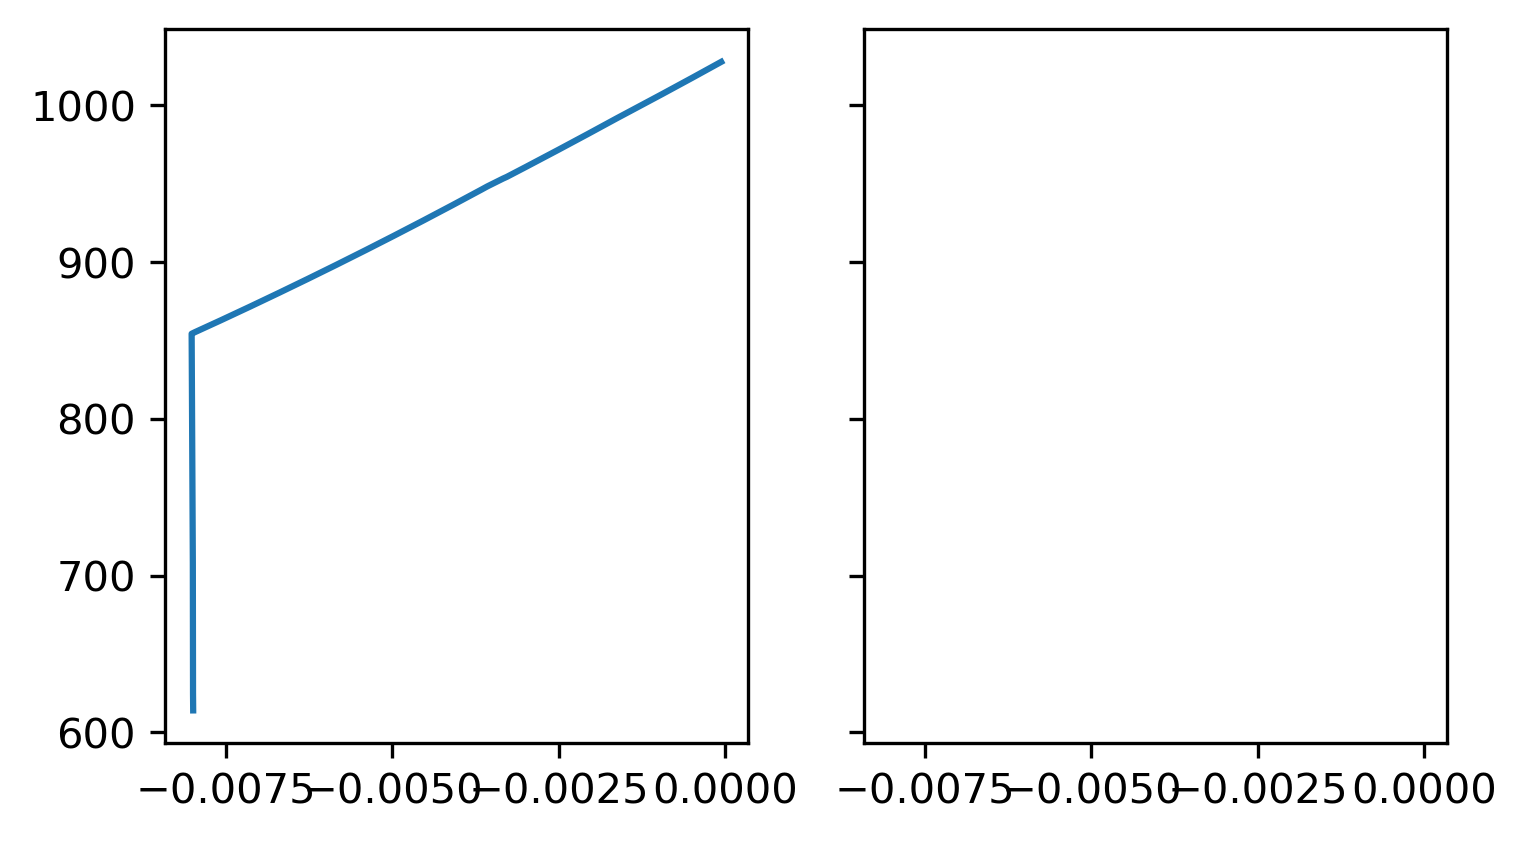

In [34]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = True, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

axs[0].plot(ff['WOBS'][0], ff['p'])

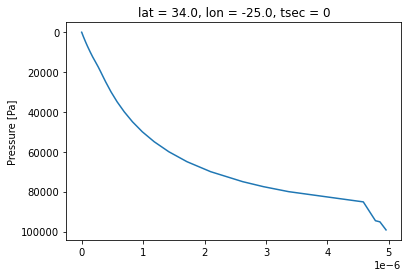

In [10]:
D0 = omega0/(f['lev'].isel(lev = 33) - f['lev'])
D0.rename('D')
D0.plot(
    y = 'lev',
    yincrease=False)

In [11]:
D0

<xarray.DataArray (lev: 34, lat: 1, lon: 1)>
array([[[-0.00000000e+00]],

       [[ 1.99083394e-09]],

       [[ 3.05602454e-09]],

       [[ 5.40325340e-09]],

       [[ 7.73811504e-09]],

       [[ 1.13719905e-08]],

       [[ 2.39179450e-08]],

       [[ 3.72384292e-08]],

       [[ 6.43451870e-08]],

       [[ 9.29082447e-08]],

...

       [[ 1.71490626e-06]],

       [[ 2.09988116e-06]],

       [[ 2.62145477e-06]],

       [[ 2.95815471e-06]],

       [[ 3.36857806e-06]],

       [[ 4.58467321e-06]],

       [[ 4.78230595e-06]],

       [[ 4.85512692e-06]],

       [[ 4.95468157e-06]],

       [[            nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 34.0
  * lon      (lon) float32 -25.0
  * lev      (lev) float32 100.0 200.0 300.0 ... 95140.25 99185.59 102900.0
    tsec     int32 0

In [8]:
rho_ref       = 1.
grav    = 9.81              # Gravity acceleration, m/s2

In [11]:
W = -f['omega']/(rho_ref*grav)
D = -W/500.

In [18]:
print(W.sel(tsec = 0).argmin(dim = 'lev'))

<xarray.DataArray 'omega' (lat: 1, lon: 1)>
array([[29]])
Coordinates:
  * lat      (lat) float32 34.0
  * lon      (lon) float32 -25.0
    tsec     int32 0


In [20]:
f['lev'].isel(lev = 29)

<xarray.DataArray 'lev' ()>
array(85135.02, dtype=float32)
Coordinates:
    lev      float32 85135.02
Attributes:
    units:          Pa
    long_name:      Pressure
    standard_name:  air_pressure

In [15]:
print(D.sel(lev = 500).sel(tsec = 0))

<xarray.DataArray 'omega' (lat: 1, lon: 1)>
array([[1.12801864e-07]], dtype=float32)
Coordinates:
  * lat      (lat) float32 34.0
  * lon      (lon) float32 -25.0
    lev      float32 500.0
    tsec     int32 0


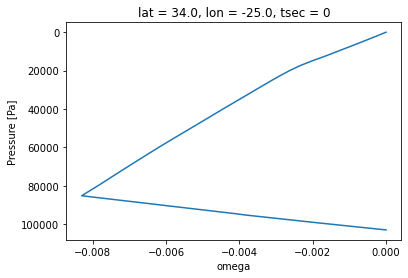

In [12]:
W.isel(tsec = 0).plot(
    y = 'lev',
    yincrease=False)

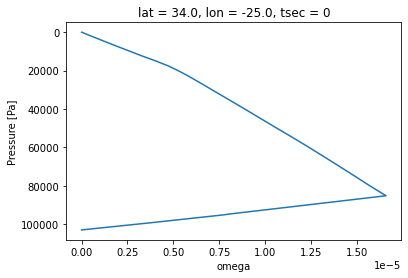

In [13]:
D.isel(tsec = 0).plot(
    y = 'lev',
    yincrease=False)